In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [69]:
df = pd.read_csv("./datasets/Car details v3.csv")

In [70]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [71]:
df.shape

(8128, 13)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [73]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [74]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [75]:
100 * df.isnull().sum()/len(df)

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [76]:
df['mileage'] = df['mileage'].str.split(' ').str[0]
df['mileage kmpl'] = df['mileage']
df.drop('mileage',axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [77]:
df['engine'] = df['engine'].str.split(' ').str[0]
df.rename(columns = {'engine':'engine CC'}, inplace = True)

In [78]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine CC,max_power,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [79]:
df['max_power'] = df['max_power'].str.split(' ').str[0]
df.rename(columns = {'max_power':'max_power_bhp'}, inplace = True)

In [80]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine CC,max_power_bhp,torque,seats,mileage kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [81]:
df1 = df['torque']
df1.head()

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [82]:
df1 = df1.str.split('@|at', n=1, expand = True)
print(df1.head())   # Removing @ and at
df1[0] = df1[0].str.replace('Nm|nm|KGM|kgm', '', regex = True)
print(df1.head())   # Replacing the str with empty
df1[0] = df1[0].str.extract(r'^(\d+\.?+\d)')[0].astype(float)
print(df1.head())   # Extract the numeric part and changing its datatype to float

           0                 1
0      190Nm           2000rpm
1      250Nm      1500-2500rpm
2       12.7   2,700(kgm@ rpm)
3  22.4 kgm       1750-2750rpm
4       11.5   4,500(kgm@ rpm)
        0                 1
0     190           2000rpm
1     250      1500-2500rpm
2    12.7   2,700(kgm@ rpm)
3  22.4        1750-2750rpm
4    11.5   4,500(kgm@ rpm)
       0                 1
0  190.0           2000rpm
1  250.0      1500-2500rpm
2   12.7   2,700(kgm@ rpm)
3   22.4      1750-2750rpm
4   11.5   4,500(kgm@ rpm)


In [83]:
df1[0] = df1[0].astype(float)
df1.loc[df1[1].str.contains('kgm', case = False, na = False), 0] *= 9.81
df1.loc[(df1[0] >= 10) & (df1[0] <= 99), 0] *= 9.81
df1.head()

,0,1
0,190.000,2000rpm
1,250.000,1500-2500rpm
2,124.587,"2,700(kgm@ rpm)"
3,219.744,1750-2750rpm
4,112.815,"4,500(kgm@ rpm)"


In [84]:
df1[1] = df1[1].str.replace(r'(rpm|kgm|@|KGM|RPM|\(.*?\))', '', regex=True)
df1.rename(columns = {0:'torque_Nm', 1:'speed_rpm'}, inplace = True)
df1.head()

,torque_Nm,speed_rpm
0,190.000,2000
1,250.000,1500-2500
2,124.587,"2,700"
3,219.744,1750-2750
4,112.815,"4,500"


In [85]:
df = pd.concat([df, df1], axis = 1)
df.drop('torque', axis = 1, inplace = True)
df.drop('mileage', axis = 1, inplace = True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,speed_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,74,5.0,23.4,190.000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,103.52,5.0,21.14,250.000,1500-2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,78,5.0,17.7,124.587,"2,700"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,90,5.0,23.0,219.744,1750-2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,88.2,5.0,16.1,112.815,"4,500"


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   engine CC      7907 non-null   object 
 9   max_power_bhp  7913 non-null   object 
 10  seats          7907 non-null   float64
 11  mileage kmpl   7907 non-null   object 
 12  torque_Nm      7905 non-null   float64
 13  speed_rpm      7864 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [87]:
df['mileage kmpl'] = df['mileage kmpl'].astype(float)
df['max_power_bhp'] = df['max_power_bhp'].replace('', np.nan)
df['max_power_bhp'] = df['max_power_bhp'].astype(float)
df['engine CC'] = df['engine CC'].astype(float)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   engine CC      7907 non-null   float64
 9   max_power_bhp  7912 non-null   float64
 10  seats          7907 non-null   float64
 11  mileage kmpl   7907 non-null   float64
 12  torque_Nm      7905 non-null   float64
 13  speed_rpm      7864 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 889.1+ KB


In [89]:
df.isnull().sum()/len(df)*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
engine CC        2.718996
max_power_bhp    2.657480
seats            2.718996
mileage kmpl     2.718996
torque_Nm        2.743602
speed_rpm        3.248031
dtype: float64

In [90]:
df['engine CC'].fillna(df['engine CC'].mean(), inplace=True)
df['max_power_bhp'].fillna(df['max_power_bhp'].mean(), inplace=True)
df['seats'].fillna(df['seats'].mean(), inplace=True)
df['mileage kmpl'].fillna(df['mileage kmpl'].mean(), inplace=True)
df['torque_Nm'].fillna(df['torque_Nm'].mean(), inplace=True)

In [91]:
df['speed_rpm'].fillna(df['speed_rpm'].mode()[0], inplace=True)

In [92]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
engine CC        0
max_power_bhp    0
seats            0
mileage kmpl     0
torque_Nm        0
speed_rpm        0
dtype: int64

In [93]:
df.shape

(8128, 14)

In [94]:
df2 = df[['selling_price', 'km_driven', 'engine CC', 'max_power_bhp', 'seats', 'mileage kmpl', 'torque_Nm']]

In [95]:
df2.corr()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm
selling_price,1.000000,-0.225534,0.453567,0.744958,0.041161,-0.125454,-0.045697
km_driven,-0.225534,1.000000,0.203954,-0.037714,0.225172,-0.171426,-0.068967
engine CC,0.453567,0.203954,1.000000,0.702152,0.610309,-0.575831,-0.261196
max_power_bhp,0.744958,-0.037714,0.702152,1.000000,0.191435,-0.373586,-0.177023
seats,0.041161,0.225172,0.610309,0.191435,1.000000,-0.452085,-0.104904
mileage kmpl,-0.125454,-0.171426,-0.575831,-0.373586,-0.452085,1.000000,0.026141
torque_Nm,-0.045697,-0.068967,-0.261196,-0.177023,-0.104904,0.026141,1.000000


<Axes: >

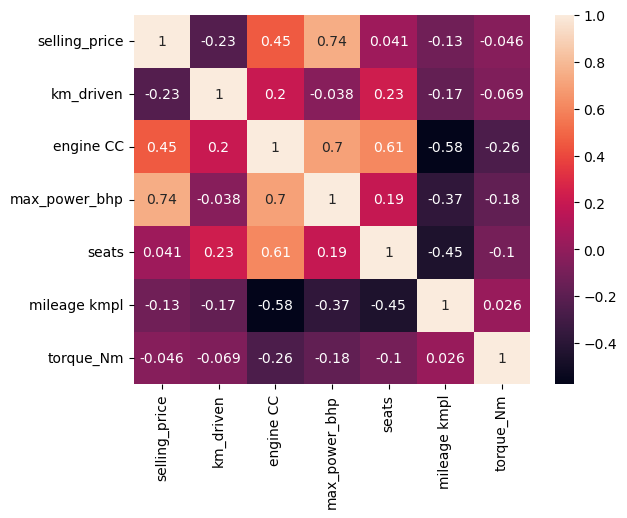

In [96]:
sns.heatmap(df2.corr(), annot=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Maruti Swift Dzire VDI'),
  Text(1, 0, 'Maruti Alto 800 LXI'),
  Text(2, 0, 'Maruti Alto LXi'),
  Text(3, 0, 'BMW X4 M Sport X xDrive20d'),
  Text(4, 0, 'Maruti Swift VDI'),
  Text(5, 0, 'Maruti Swift VDI BSIV'),
  Text(6, 0, 'Maruti Wagon R LXI'),
  Text(7, 0, 'Maruti Alto K10 VXI'),
  Text(8, 0, 'Hyundai EON Era Plus'),
  Text(9, 0, 'Maruti Wagon R VXI BS IV')])

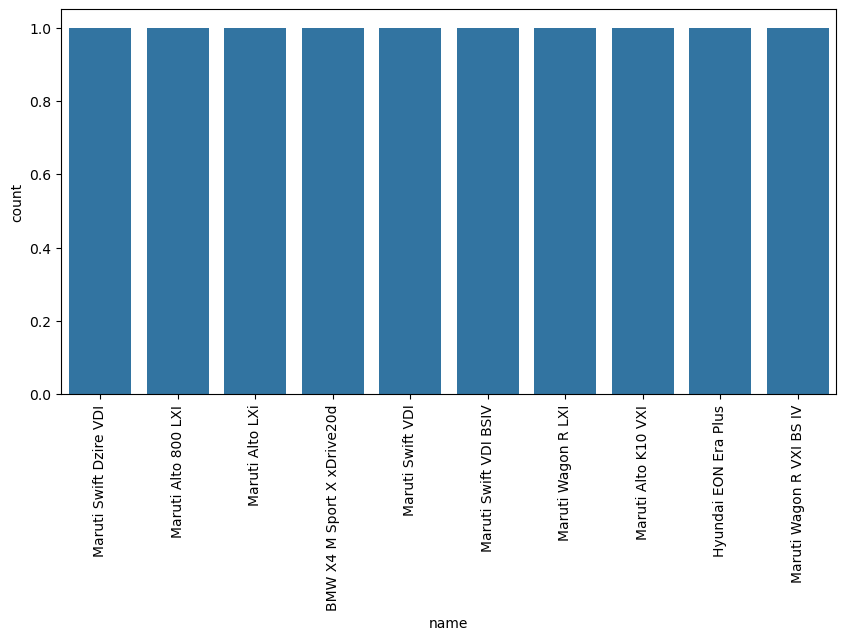

In [97]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(df['name'].value_counts()[:10])
plt.xticks(rotation = 90)

<Axes: xlabel='fuel', ylabel='count'>

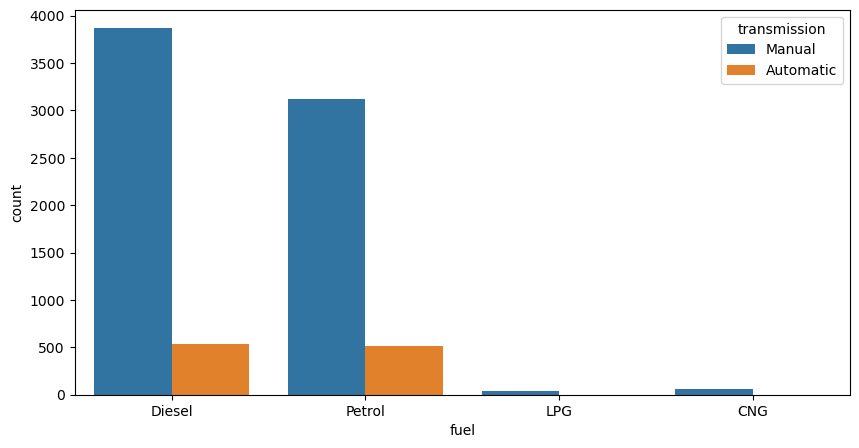

In [98]:
fig = plt.figure(figsize = (10, 5))
sns.countplot(x= 'fuel', hue = 'transmission', data = df)

<Axes: xlabel='fuel,transmission'>

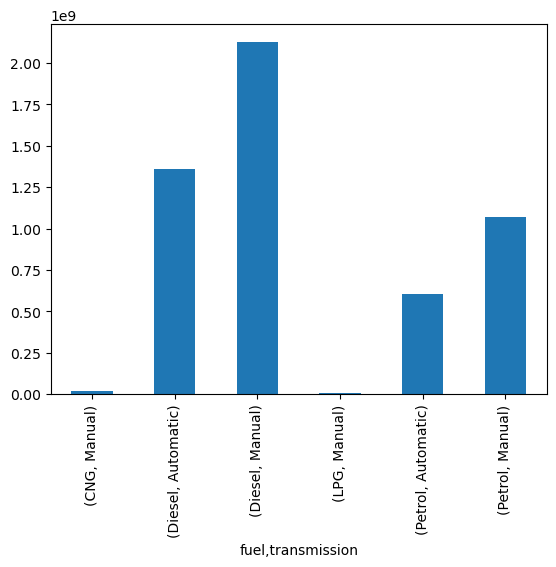

In [99]:
df.groupby(['fuel', 'transmission'])['selling_price'].sum().plot(kind = 'bar')

<Axes: xlabel='fuel,transmission,seller_type'>

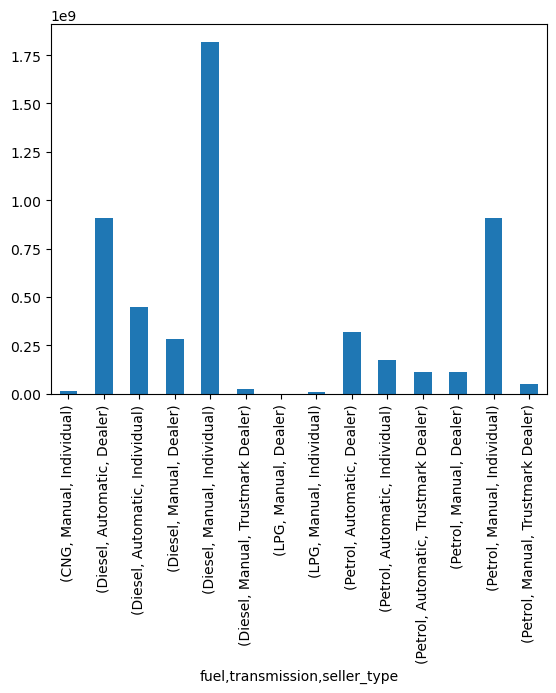

In [100]:
df.groupby(['fuel', 'transmission', 'seller_type'])['selling_price'].sum().plot(kind = 'bar')

In [101]:
y = df2['selling_price']
x = df2.drop('selling_price', axis = 1)

In [102]:
x.head(),y.head()

(   km_driven  engine CC  max_power_bhp  seats  mileage kmpl  torque_Nm
 0     145500     1248.0          74.00    5.0         23.40    190.000
 1     120000     1498.0         103.52    5.0         21.14    250.000
 2     140000     1497.0          78.00    5.0         17.70    124.587
 3     127000     1396.0          90.00    5.0         23.00    219.744
 4     120000     1298.0          88.20    5.0         16.10    112.815,
 0    450000
 1    370000
 2    158000
 3    225000
 4    130000
 Name: selling_price, dtype: int64)

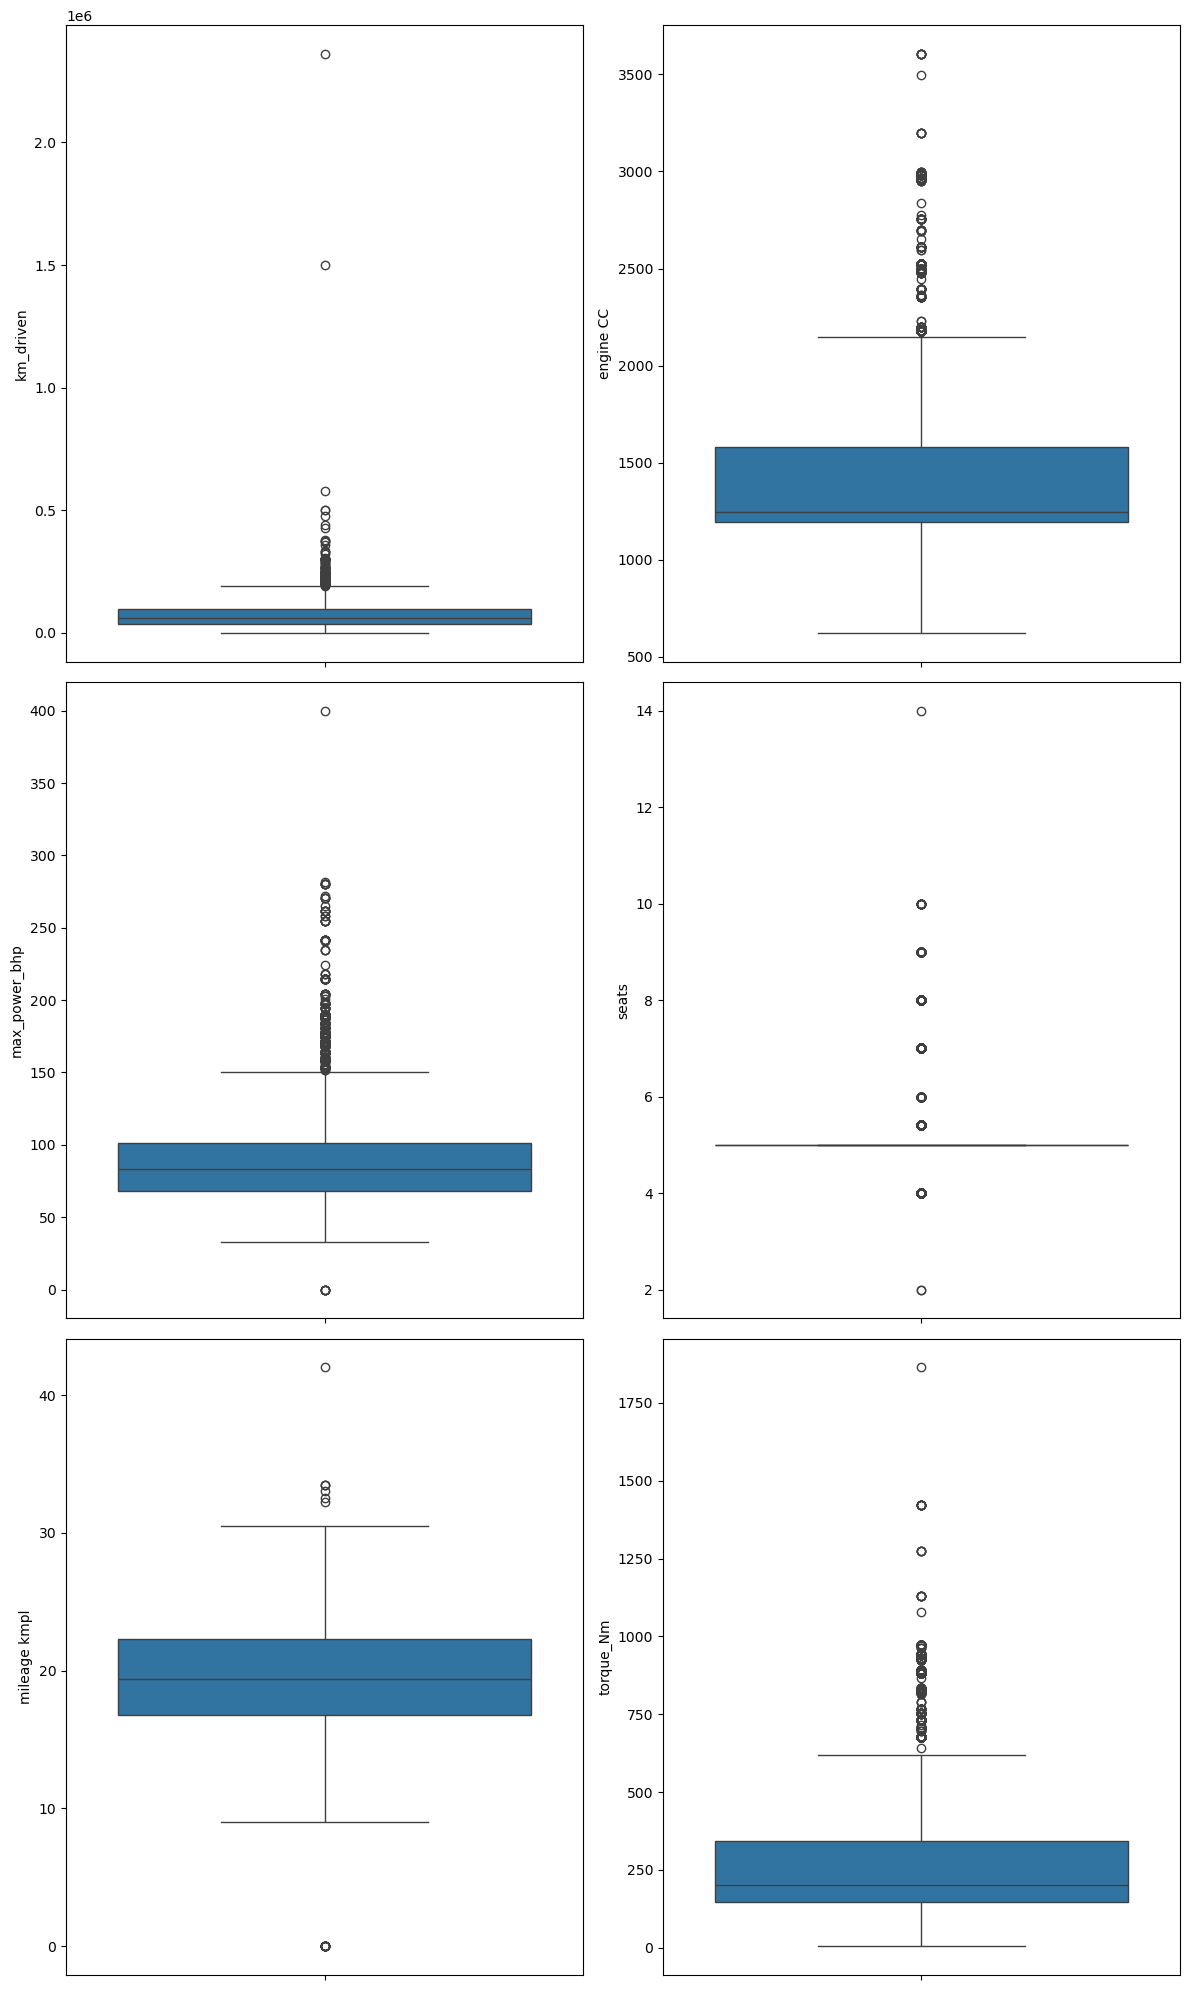

In [103]:
fig, axs = plt.subplots(3, 2, figsize=(12, 20))
plt1 = sns.boxplot(df2['km_driven'], ax = axs[0,0])
plt2 = sns.boxplot(df2['engine CC'], ax = axs[0,1])
plt3 = sns.boxplot(df2['max_power_bhp'], ax = axs[1,0])
plt4 = sns.boxplot(df2['seats'], ax = axs[1,1])
plt5 = sns.boxplot(df2['mileage kmpl'], ax = axs[2,0])
plt6 = sns.boxplot(df2['torque_Nm'], ax = axs[2,1])
plt.tight_layout()
plt.show()

<Axes: xlabel='year', ylabel='selling_price'>

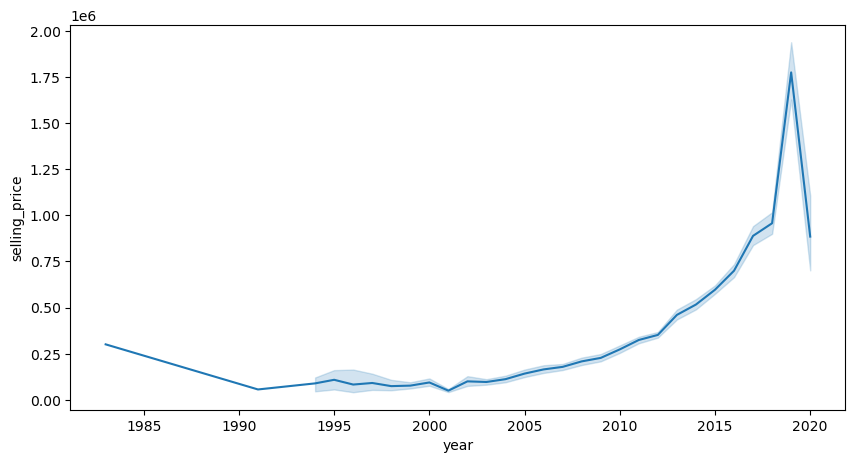

In [104]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'year', y = 'selling_price', data = df)

C:\Users\B\AppData\Local\Temp\ipykernel_26448\4140113099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['max_power_bhp'])


<Axes: xlabel='max_power_bhp', ylabel='Density'>

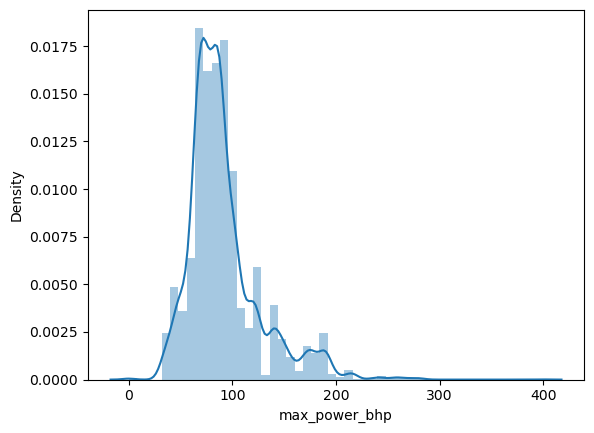

In [105]:
sns.distplot(df2['max_power_bhp'])

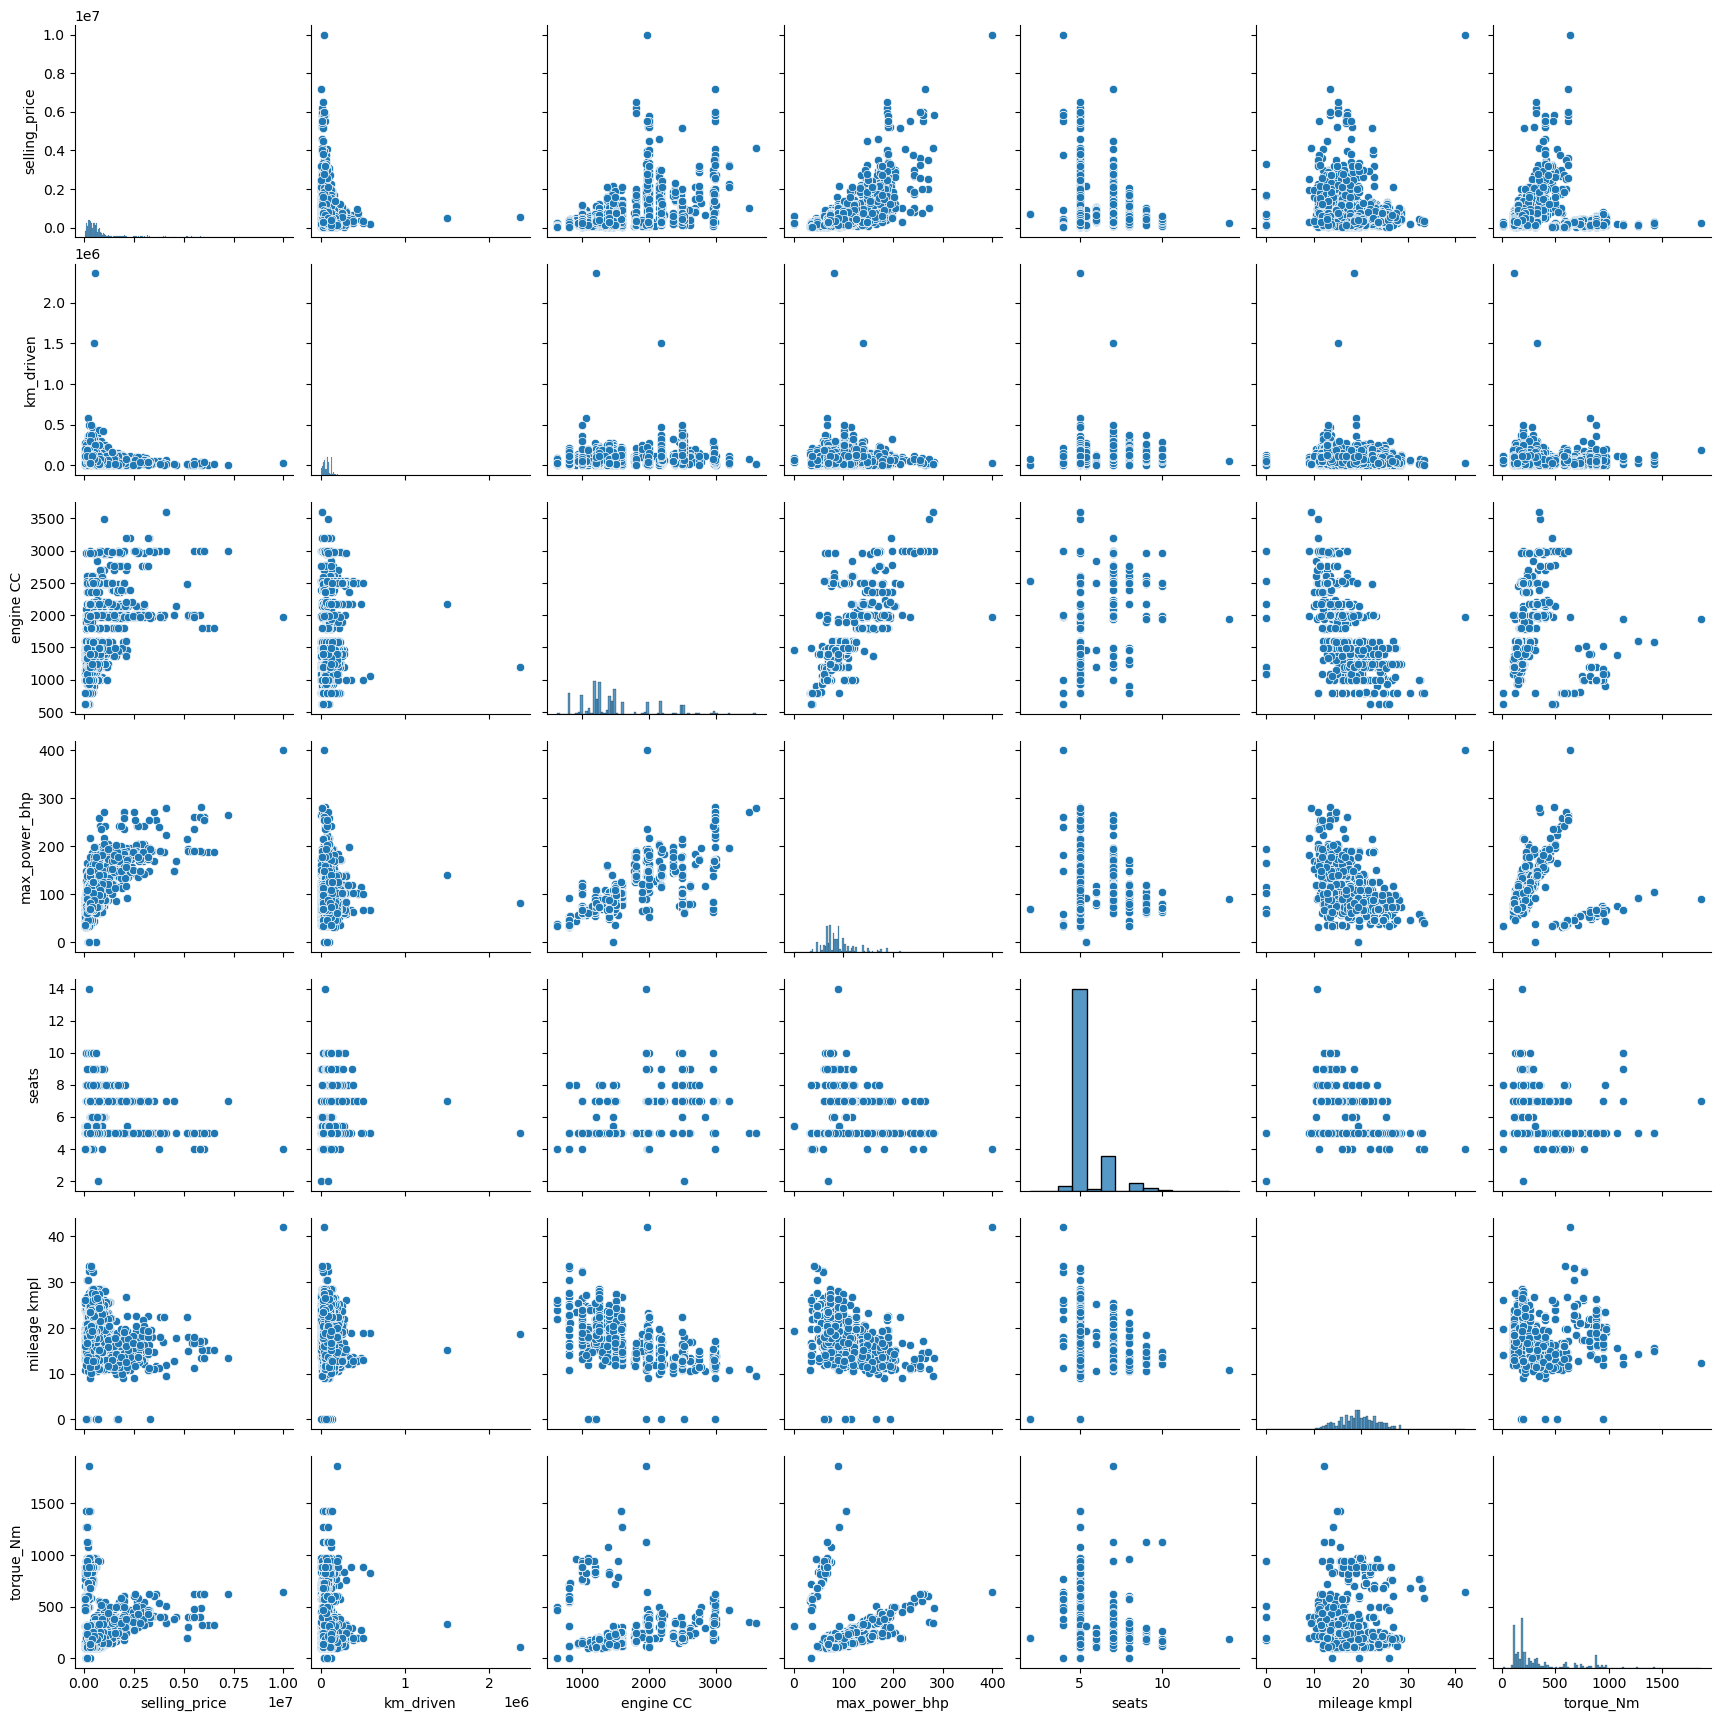

In [106]:
sns.pairplot(df2)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
x_train.shape

(6502, 6)

In [109]:
y_train.shape

(6502,)

In [110]:
x_test.shape

(1626, 6)

In [111]:
y_test.shape

(1626,)

In [112]:
reg_model = linear_model.LinearRegression()
reg_model.fit(x_train, y_train)
y_pred = reg_model.predict(x_test)

Text(0, 0.5, 'y_pred')

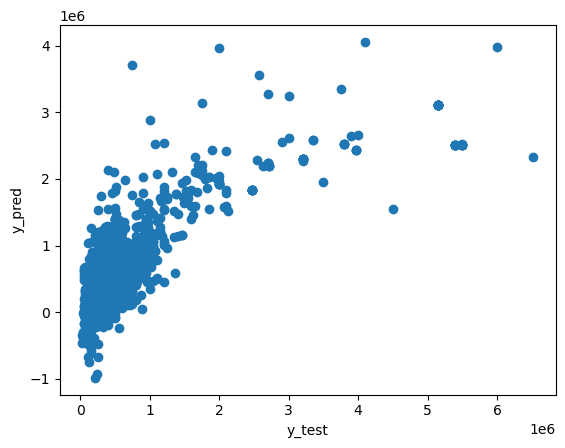

In [113]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [114]:
print("R2 Score:",r2_score(y_test, y_pred))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))
print("Mean squared error:",mean_squared_error(y_test, y_pred))

R2 Score: 0.6354495257059303
Mean absolute error: 286906.9723753028
Mean squared error: 238957163641.90533


In [115]:
coefficients = pd.DataFrame(reg_model.coef_, x.columns, columns = ['coefficient'])
coefficients

,coefficient
km_driven,-2.295246
engine CC,174.942416
max_power_bhp,17065.849712
seats,-42449.423032
mileage kmpl,32606.330684
torque_Nm,312.490029


In [116]:
df.drop(['name','year','speed_rpm'], axis=1, inplace=True, errors = 'ignore')

In [117]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm
0,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,23.40,190.000
1,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,21.14,250.000
2,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,17.70,124.587
3,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,23.00,219.744
4,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,16.10,112.815


In [118]:
df = pd.get_dummies(df, columns = ['fuel','seller_type','transmission','owner'],drop_first = True)

In [119]:
df.head()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,1248.0,74.00,5.0,23.40,190.000,True,False,False,True,False,True,False,False,False,False
1,370000,120000,1498.0,103.52,5.0,21.14,250.000,True,False,False,True,False,True,False,True,False,False
2,158000,140000,1497.0,78.00,5.0,17.70,124.587,False,False,True,True,False,True,False,False,False,True
3,225000,127000,1396.0,90.00,5.0,23.00,219.744,True,False,False,True,False,True,False,False,False,False
4,130000,120000,1298.0,88.20,5.0,16.10,112.815,False,False,True,True,False,True,False,False,False,False


In [120]:
df.columns

Index(['selling_price', 'km_driven', 'engine CC', 'max_power_bhp', 'seats',
       'mileage kmpl', 'torque_Nm', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [121]:
df['fuel_Diesel'] = df['fuel_Diesel'].map({False: 0, True: 1})
df['fuel_LPG'] = df['fuel_LPG'].map({False: 0, True: 1})
df['fuel_Petrol'] = df['fuel_Petrol'].map({False: 0, True: 1})

df['seller_type_Individual'] = df['seller_type_Individual'].map({False: 0, True: 1})
df['seller_type_Trustmark Dealer'] = df['seller_type_Trustmark Dealer'].map({False: 0, True: 1})

df['transmission_Manual'] = df['transmission_Manual'].map({False: 0, True: 1})

df['owner_Fourth & Above Owner'] = df['owner_Fourth & Above Owner'].map({False: 0, True: 1})
df['owner_Second Owner'] = df['owner_Second Owner'].map({False: 0, True: 1})
df['owner_Test Drive Car'] = df['owner_Test Drive Car'].map({False: 0, True: 1})
df['owner_Third Owner'] = df['owner_Third Owner'].map({False: 0, True: 1})

In [122]:
df.head()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,1248.0,74.00,5.0,23.40,190.000,1,0,0,1,0,1,0,0,0,0
1,370000,120000,1498.0,103.52,5.0,21.14,250.000,1,0,0,1,0,1,0,1,0,0
2,158000,140000,1497.0,78.00,5.0,17.70,124.587,0,0,1,1,0,1,0,0,0,1
3,225000,127000,1396.0,90.00,5.0,23.00,219.744,1,0,0,1,0,1,0,0,0,0
4,130000,120000,1298.0,88.20,5.0,16.10,112.815,0,0,1,1,0,1,0,0,0,0


In [123]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [125]:
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns)

In [126]:
df_train_scaled.head()

,selling_price,km_driven,engine CC,max_power_bhp,seats,mileage kmpl,torque_Nm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.049148,0.001084,0.192953,0.209525,0.25,0.571429,0.058738,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027081,0.033891,0.192617,0.217000,0.25,0.461905,0.056049,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.035105,0.063547,0.259060,0.225000,0.25,0.547619,0.115617,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.050151,0.050837,0.209396,0.185000,0.25,0.557143,0.099618,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.030592,0.010591,0.125503,0.167625,0.25,0.570238,0.472325,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

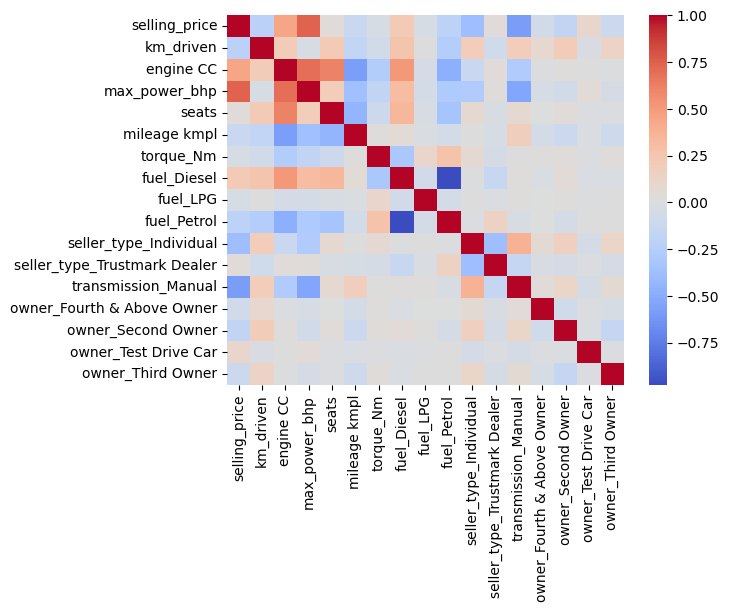

In [127]:
sns.heatmap(df_train_scaled.corr(), annot=False, cmap='coolwarm')

In [128]:
import statsmodels.api as sm

y_train = df_train_scaled['selling_price']
x_train = df_train_scaled.drop('selling_price', axis=1)

In [129]:
x_train_lm = sm.add_constant(x_train[['km_driven']])
lr = sm.OLS(y_train, x_train_lm).fit()

In [130]:
lr.params

const        0.082016
km_driven   -0.706521
dtype: float64

In [131]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     318.8
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           1.19e-69
Time:                        14:13:03   Log-Likelihood:                 7289.2
No. Observations:                6502   AIC:                        -1.457e+04
Df Residuals:                    6500   BIC:                        -1.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0820      0.002     53.663      0.000       0.079       0.085
km_driven     -0.7065      0.040    -17.855      0.000      -0.784      -0.629
==============================================================================
Omnibus:                     5615.268   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146234.398
Skew:                           4.192   Prob(JB):                         0.00
Kurtosis:                      24.668   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
x_train_lm = sm.add_constant(x_train[['km_driven','mileage kmpl']])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          7.49e-110
Time:                        14:13:03   Log-Likelihood:                 7384.9
No. Observations:                6502   AIC:                        -1.476e+04
Df Residuals:                    6499   BIC:                        -1.474e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1514      0.005     29.103      0.000       0.141       0.162
km_driven       -0.8001      0.040    -20.220      0.000      -0.878      -0.723
mileage kmpl    -0.1442      0.010    -13.936      0.000      -0.164      -0.124
==============================================================================
Omnibus:                     5654.447   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163579.240
Skew:                           4.189   Prob(JB):                         0.00
Kurtosis:                      26.100   Cond. No.                         45.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""